## Cleaning 'Hipotesis File'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

**Reading file**

In [2]:
df = pd.read_csv(r'hipotesis.csv', index_col=0) 

In [3]:
len(df)

206669

**Checking**

In [5]:
df.head()

CODIGO_SINIESTRO       FECHA CODIGO_CAUSA  \
0           4401449  01/01/2015          114   
1           4401447  01/01/2015          121   
2           4401438  01/01/2015          157   
3           4401429  01/01/2015          116   
4           4401433  01/01/2015          121   

                          DESCRIPCION  CODIGO_CAUSA2 DESCRIPCION2  
0                 EMBRIAGUEZ APARENTE            NaN          NaN  
1  NO MANTENER DISTANCIA DE SEGURIDAD            NaN          NaN  
2                                OTRA            NaN          NaN  
3                 EXCESO DE VELOCIDAD            NaN          NaN  
4  NO MANTENER DISTANCIA DE SEGURIDAD            NaN          NaN

In [6]:
len(df)

206669

**Dropping duplicates**

In [7]:
df.drop_duplicates(inplace=True)
len(df)

197220

**Dropping null values**

In [8]:
df[df['CODIGO_CAUSA']=='0'].isnull().sum()

CODIGO_SINIESTRO       0
FECHA                  0
CODIGO_CAUSA           0
DESCRIPCION         9097
CODIGO_CAUSA2       9097
DESCRIPCION2        9097
dtype: int64

In [9]:
df.drop(df[df['CODIGO_CAUSA']=='0'].index, inplace=True)
len(df)

188123

**Checking values with code and no description**

In [10]:
df[df['DESCRIPCION'].isnull()]
len(df[df['DESCRIPCION'].isnull()])

47

**Making a dictionary of "CODIGO_CAUSA" and " "DESCRIPCION" 1 y 2**

In [11]:
z1 = pd.DataFrame(df.groupby(['CODIGO_CAUSA','DESCRIPCION'])['DESCRIPCION'].count())
z1.rename(columns={'DESCRIPCION': 'CANTIDAD'}, inplace=True)
z1.reset_index(inplace=True)
z1.head()

CODIGO_CAUSA                  DESCRIPCION  CANTIDAD
0          101           ADELANTAR EN CURVA       288
1          102     ADELANTAR POR LA DERECHA      1821
2          103           ADELANTAR CERRANDO     27815
3          104     ADELANTAR INVADIENDO VIA      3340
4          105  ADELANTAR EN ZONA PROHIBIDA       701

In [12]:
z2 = pd.DataFrame(df.groupby(['CODIGO_CAUSA2','DESCRIPCION2'])['DESCRIPCION2'].count())
z2.rename(columns={'DESCRIPCION2': 'CANTIDAD'}, inplace=True)
z2.reset_index(inplace=True)
z2.head()

CODIGO_CAUSA2                                       DESCRIPCION2  CANTIDAD
0           90.0                   TRANSPORTAR OTRA PERSONA O COSAS        34
1           91.0                          NO CONDUCIR EN HORCAJADAS         1
2           92.0                           NO SUJETAR LOS MANUBRIOS         2
3           93.0  TRANSITAR DISTANTE DE LA ACERA U ORILLA DE LA ...        65
4           94.0  CIRCULAR POR CALZADAS DESTINADAS A BUSES Y BUS...        27

In [11]:
z2['CODIGO_CAUSA2'] = z2['CODIGO_CAUSA2'].astype(int)
z2['CODIGO_CAUSA2'] = z2['CODIGO_CAUSA2'].astype(str)

In [12]:
z2.head()

CODIGO_CAUSA2                                       DESCRIPCION2  CANTIDAD
0            90                   TRANSPORTAR OTRA PERSONA O COSAS        34
1            91                          NO CONDUCIR EN HORCAJADAS         1
2            92                           NO SUJETAR LOS MANUBRIOS         2
3            93  TRANSITAR DISTANTE DE LA ACERA U ORILLA DE LA ...        65
4            94  CIRCULAR POR CALZADAS DESTINADAS A BUSES Y BUS...        27

In [13]:
z2.rename(columns={'DESCRIPCION2': 'DESCRIPCION', 'CODIGO_CAUSA2':'CODIGO_CAUSA' }, inplace=True)

In [14]:
z2.head()

CODIGO_CAUSA                                        DESCRIPCION  CANTIDAD
0           90                   TRANSPORTAR OTRA PERSONA O COSAS        34
1           91                          NO CONDUCIR EN HORCAJADAS         1
2           92                           NO SUJETAR LOS MANUBRIOS         2
3           93  TRANSITAR DISTANTE DE LA ACERA U ORILLA DE LA ...        65
4           94  CIRCULAR POR CALZADAS DESTINADAS A BUSES Y BUS...        27

In [15]:
z1z2=pd.concat([z1,z2])

In [16]:
del(z1z2['CANTIDAD'])

In [17]:
z1z2.drop_duplicates(inplace=True)

In [18]:
z1z2['CODIGO_CAUSA'].value_counts().head(6)

112    3
137    2
106    2
121    2
306    2
501    1
Name: CODIGO_CAUSA, dtype: int64

**COMMENT :**The numbers 112, 106, 121, 137, 306 are repeated, I'm going to assign another number for the description

In [ ]:
z1z2.to_csv('diccionario_causas.csv', index=False)

In [13]:
diccionario = pd.read_csv(r'diccionario_causas.csv')

In [14]:
diccionario['CODIGO_CAUSA'].value_counts().head(10)

154        1
ANT-133    1
102        1
116        1
ANT-106    1
101        1
307        1
95         1
117        1
99         1
Name: CODIGO_CAUSA, dtype: int64

In [15]:
diccionario['CODIGO_CAUSA'].dtypes

dtype('O')

In [16]:
descripcion1 = df[['CODIGO_SINIESTRO', 'CODIGO_CAUSA']].copy()
descripcion2 = df[['CODIGO_SINIESTRO', 'CODIGO_CAUSA2']].copy()
descripcion2 = descripcion2[~descripcion2['CODIGO_CAUSA2'].isnull()]
descripcion2.rename(columns={'CODIGO_CAUSA2': 'CODIGO_CAUSA'}, inplace=True)

In [17]:
descripcion1['CODIGO_SINIESTRO'] = descripcion1['CODIGO_SINIESTRO'].astype(int)
descripcion2['CODIGO_SINIESTRO'] = descripcion2['CODIGO_SINIESTRO'].astype(int)
#descripcion1['CODIGO_SINIESTRO'] = descripcion1['CODIGO_SINIESTRO'].astype(str)

In [18]:
display(descripcion1.head())
display(descripcion2.head())

CODIGO_SINIESTRO CODIGO_CAUSA
0           4401449          114
1           4401447          121
2           4401438          157
3           4401429          116
4           4401433          121

CODIGO_SINIESTRO  CODIGO_CAUSA
7            4401425         115.0
8            4401437         104.0
13           4401453         157.0
46           4401491         116.0
68           4401542         127.0

In [19]:
descripcion2['CODIGO_CAUSA'] = descripcion2['CODIGO_CAUSA'].astype(int)
descripcion2['CODIGO_CAUSA'] = descripcion2['CODIGO_CAUSA'].astype(str)
print(len(descripcion1))
print(len(descripcion2))

188123
7622


In [20]:
display(descripcion1.isnull().sum())
display(descripcion2.isnull().sum())

CODIGO_SINIESTRO    0
CODIGO_CAUSA        0
dtype: int64

CODIGO_SINIESTRO    0
CODIGO_CAUSA        0
dtype: int64

In [21]:
display(descripcion1.dtypes)
display(descripcion2.dtypes)

CODIGO_SINIESTRO     int32
CODIGO_CAUSA        object
dtype: object

CODIGO_SINIESTRO     int32
CODIGO_CAUSA        object
dtype: object

In [22]:
descripcion1 = pd.concat([descripcion1, descripcion2])
descripcion1.reset_index(drop=True)

CODIGO_SINIESTRO CODIGO_CAUSA
0                4401449          114
1                4401447          121
2                4401438          157
3                4401429          116
4                4401433          121
5                4401423          112
6                4401430          157
7                4401425          139
8                4401437          127
9                4401442          116
10               4401442          411
11               4401443          103
12               4401420          103
13               4401453          139
14               4401422           99
15               4401448          139
16               4401455          157
17               4401454          157
18               4401477          121
19               4401481          121
20               4401512          157
21               4401533          121
22               4401538          122
23               4401749          103
24               4401419          119
25               4401424          202
26               4401426          112
27               4401427          157
28               4401435          103
29               4401484          121
...                  ...          ...
195715          10506729          410
195716          10507138          157
195717          10506887          104
195718          10507106          132
195719          10506875          104
195720          10507127          103
195721          10507077          409
195722          10507017          157
195723          10507032          113
195724          10507206          134
195725          10507082          411
195726          10507056          114
195727          10507279          157
195728          10507037          142
195729          10507092          411
195730          10507212          157
195731          10507278          103
195732          10507203          304
195733          10507270          157
195734          10507089          114
195735          10507216          157
195736          10507048          102
195737          10507333          115
195738          10507389          116
195739          10507219          127
195740          10507221          121
195741          10507408          145
195742          10507442          114
195743          10507369          410
195744          10507382          410

[195745 rows x 2 columns]

In [23]:
print(len(descripcion1))

195745


In [24]:
descripcion1 = pd.merge(descripcion1, diccionario, how='outer')
descripcion1.reset_index(drop=True)

CODIGO_SINIESTRO CODIGO_CAUSA  \
0              4401449.0          114   
1              4401903.0          114   
2              4401943.0          114   
3              4402711.0          114   
4              4402843.0          114   
5              4403013.0          114   
6              4402998.0          114   
7              4403259.0          114   
8              4403556.0          114   
9              4403695.0          114   
10             4404175.0          114   
11             4404207.0          114   
12             4405083.0          114   
13             4405395.0          114   
14             4406033.0          114   
15             4406074.0          114   
16             4406174.0          114   
17             4406724.0          114   
18             4406789.0          114   
19             4407587.0          114   
20             4407622.0          114   
21             4408163.0          114   
22             4408082.0          114   
23             4408124.0          114   
24             4408793.0          114   
25             4408901.0          114   
26             4408792.0          114   
27             4409206.0          114   
28             4409556.0          114   
29             4409817.0          114   
...                  ...          ...   
195716         4480442.0           91   
195717         4452803.0          209   
195718         4461022.0          209   
195719         4503926.0          209   
195720         4462204.0           96   
195721         4488921.0           96   
195722         4498108.0           96   
195723         4508033.0           96   
195724         4514731.0           96   
195725        10451008.0           96   
195726        10456170.0           96   
195727        10456498.0           96   
195728        10473078.0           96   
195729        10498937.0           96   
195730         4473369.0          505   
195731         4503909.0          505   
195732         4513102.0          505   
195733         4480451.0          210   
195734         4492913.0          208   
195735         4492892.0          150   
195736        10465526.0          150   
195737         4501993.0          215   
195738         4515521.0      ANT-107   
195739        10449015.0      ANT-107   
195740        10482757.0      ANT-107   
195741        10449354.0      ANT-133   
195742        10462721.0      ANT-106   
195743        10470568.0          216   
195744        10487572.0          206   
195745               NaN      ANT-306   

                                              DESCRIPCION  
0                                     EMBRIAGUEZ APARENTE  
1                                     EMBRIAGUEZ APARENTE  
2                                     EMBRIAGUEZ APARENTE  
3                                     EMBRIAGUEZ APARENTE  
4                                     EMBRIAGUEZ APARENTE  
5                                     EMBRIAGUEZ APARENTE  
6                                     EMBRIAGUEZ APARENTE  
7                                     EMBRIAGUEZ APARENTE  
8                                     EMBRIAGUEZ APARENTE  
9                                     EMBRIAGUEZ APARENTE  
10                                    EMBRIAGUEZ APARENTE  
11                                    EMBRIAGUEZ APARENTE  
12                                    EMBRIAGUEZ APARENTE  
13                                    EMBRIAGUEZ APARENTE  
14                                    EMBRIAGUEZ APARENTE  
15                                    EMBRIAGUEZ APARENTE  
16                                    EMBRIAGUEZ APARENTE  
17                                    EMBRIAGUEZ APARENTE  
18                                    EMBRIAGUEZ APARENTE  
19                                    EMBRIAGUEZ APARENTE  
20                                    EMBRIAGUEZ APARENTE  
21                                    EMBRIAGUEZ APARENTE  
22                                    EMBRIAGUEZ APARENTE  
23                       

**COMMENT :** Checking the merge

In [25]:
display(descripcion1[descripcion1['CODIGO_SINIESTRO']==4401449])
display(df[df['CODIGO_SINIESTRO']==4401449])

CODIGO_SINIESTRO CODIGO_CAUSA          DESCRIPCION
0         4401449.0          114  EMBRIAGUEZ APARENTE

CODIGO_SINIESTRO       FECHA CODIGO_CAUSA          DESCRIPCION  \
0           4401449  01/01/2015          114  EMBRIAGUEZ APARENTE   

   CODIGO_CAUSA2 DESCRIPCION2  
0            NaN          NaN

**COMMENT :** Checking the NaN values

In [26]:
descripcion1[descripcion1['DESCRIPCION'].isnull()]

Empty DataFrame
Columns: [CODIGO_SINIESTRO, CODIGO_CAUSA, DESCRIPCION]
Index: []

**COMMENT :** Checking  "CODIGO_SINIESTRO" duplicates

In [27]:
descripcion1['CODIGO_SINIESTRO'].value_counts().head()

4491301.0     5
4404696.0     5
4453216.0     4
4406981.0     4
10448566.0    4
Name: CODIGO_SINIESTRO, dtype: int64

**COMMENT :** as it can be seen, the repeated values hide diferents descriptions, and maximun value is 4

In [28]:
duplicados = descripcion1[descripcion1['CODIGO_SINIESTRO'].duplicated()].copy()

In [29]:
without_duplicates = descripcion1[~descripcion1.index.isin(duplicados.index)].copy()
len(without_duplicates)

173076

In [30]:
without_duplicates.head()

CODIGO_SINIESTRO CODIGO_CAUSA          DESCRIPCION
0         4401449.0          114  EMBRIAGUEZ APARENTE
1         4401903.0          114  EMBRIAGUEZ APARENTE
2         4401943.0          114  EMBRIAGUEZ APARENTE
3         4402711.0          114  EMBRIAGUEZ APARENTE
4         4402843.0          114  EMBRIAGUEZ APARENTE

**COMMENT :** with the DF "duplicados" the necessary columns will be created to horizontalize the hypotheses and thus use a single code

In [31]:
without_duplicates['CODIGO_SINIESTRO'].dropna(inplace=True)
without_duplicates['CODIGO_SINIESTRO'].astype(int).value_counts().head()

4458495     1
4424389     1
4488485     1
4486436     1
10505507    1
Name: CODIGO_SINIESTRO, dtype: int64

In [32]:
duplicados2 = duplicados[duplicados['CODIGO_SINIESTRO'].duplicated()]
without_duplicates2 = duplicados[~duplicados.index.isin(duplicados2.index)].copy()
len(without_duplicates2)

21187

In [33]:
without_duplicates2['CODIGO_SINIESTRO'].value_counts().head()

10485746.0    1
4511356.0     1
4403735.0     1
10447518.0    1
4470610.0     1
Name: CODIGO_SINIESTRO, dtype: int64

In [34]:
duplicados3 = duplicados2[duplicados2['CODIGO_SINIESTRO'].duplicated()]

In [35]:
without_duplicates3 = duplicados2[~duplicados2.index.isin(duplicados3.index)].copy()

In [36]:
without_duplicates3['CODIGO_SINIESTRO'].value_counts().head()

4492575.0    1
4412640.0    1
4432116.0    1
4461718.0    1
4412570.0    1
Name: CODIGO_SINIESTRO, dtype: int64

In [37]:
duplicados3['CODIGO_SINIESTRO'].value_counts().head()

4491301.0     2
4404696.0     2
10481643.0    1
4469149.0     1
10506634.0    1
Name: CODIGO_SINIESTRO, dtype: int64

In [38]:
duplicados4 = duplicados3[duplicados3['CODIGO_SINIESTRO'].duplicated()]
without_duplicates4 = duplicados3[~duplicados3.index.isin(duplicados4.index)].copy()

In [39]:
without_duplicates4['CODIGO_SINIESTRO'].value_counts().head()

10481643.0    1
4469149.0     1
10506634.0    1
4431165.0     1
10495924.0    1
Name: CODIGO_SINIESTRO, dtype: int64

In [40]:
duplicados4

CODIGO_SINIESTRO CODIGO_CAUSA                            DESCRIPCION
191539         4404696.0          301    AUSENCIA TOTAL O PARCIAL DE SEÑALES
194165         4491301.0          302  AUSENCIA O DEFICIENCIA DE DEMARCACION

**COMMENT :** It will proceed to put all together using pandas merge without_duplicates + without_duplicates2 + without_duplicates3 + without_duplicates3, we are going to dicard last one (duplicados4)

In [41]:
without_duplicates2.rename(columns={'CODIGO_CAUSA': 'CODIGO_CAUSA2','DESCRIPCION':'DESCRIPCION2'}, inplace=True)
without_duplicates3.rename(columns={'CODIGO_CAUSA': 'CODIGO_CAUSA3','DESCRIPCION':'DESCRIPCION3'}, inplace=True)
without_duplicates4.rename(columns={'CODIGO_CAUSA': 'CODIGO_CAUSA4','DESCRIPCION':'DESCRIPCION4'}, inplace=True)

**COMMENT :** As we see, descripcion2 has duplicates also

In [42]:
primer_merge = pd.merge(without_duplicates, without_duplicates2, how='outer' )

In [43]:
primer_merge.head().T

0                                    1  \
CODIGO_SINIESTRO          4.40145e+06                           4.4019e+06   
CODIGO_CAUSA                      114                                  114   
DESCRIPCION       EMBRIAGUEZ APARENTE                  EMBRIAGUEZ APARENTE   
CODIGO_CAUSA2                     NaN                                   99   
DESCRIPCION2                      NaN  NO HACER USO DE SEÑALES REFLECTIVAS   

                                    2                    3  \
CODIGO_SINIESTRO          4.40194e+06          4.40271e+06   
CODIGO_CAUSA                      114                  114   
DESCRIPCION       EMBRIAGUEZ APARENTE  EMBRIAGUEZ APARENTE   
CODIGO_CAUSA2                     NaN                  NaN   
DESCRIPCION2                      NaN                  NaN   

                                       4  
CODIGO_SINIESTRO             4.40284e+06  
CODIGO_CAUSA                         114  
DESCRIPCION          EMBRIAGUEZ APARENTE  
CODIGO_CAUSA2                        139  
DESCRIPCION2      IMPERICIA EN EL MANEJO

In [44]:
len(primer_merge)

173075

In [45]:
segundo_merge =  pd.merge(primer_merge, without_duplicates3, how='outer' )

In [46]:
segundo_merge.head().T

0                                    1  \
CODIGO_SINIESTRO          4.40145e+06                           4.4019e+06   
CODIGO_CAUSA                      114                                  114   
DESCRIPCION       EMBRIAGUEZ APARENTE                  EMBRIAGUEZ APARENTE   
CODIGO_CAUSA2                     NaN                                   99   
DESCRIPCION2                      NaN  NO HACER USO DE SEÑALES REFLECTIVAS   
CODIGO_CAUSA3                     NaN                                  NaN   
DESCRIPCION3                      NaN                                  NaN   

                                    2                    3  \
CODIGO_SINIESTRO          4.40194e+06          4.40271e+06   
CODIGO_CAUSA                      114                  114   
DESCRIPCION       EMBRIAGUEZ APARENTE  EMBRIAGUEZ APARENTE   
CODIGO_CAUSA2                     NaN                  NaN   
DESCRIPCION2                      NaN                  NaN   
CODIGO_CAUSA3                     NaN                  NaN   
DESCRIPCION3                      NaN                  NaN   

                                       4  
CODIGO_SINIESTRO             4.40284e+06  
CODIGO_CAUSA                         114  
DESCRIPCION          EMBRIAGUEZ APARENTE  
CODIGO_CAUSA2                        139  
DESCRIPCION2      IMPERICIA EN EL MANEJO  
CODIGO_CAUSA3                        NaN  
DESCRIPCION3                         NaN

In [47]:
len(segundo_merge)

173075

In [48]:
tercer_merge =  pd.merge(segundo_merge, without_duplicates4, how='outer' )

In [49]:
tercer_merge.head().T

0                                    1  \
CODIGO_SINIESTRO          4.40145e+06                           4.4019e+06   
CODIGO_CAUSA                      114                                  114   
DESCRIPCION       EMBRIAGUEZ APARENTE                  EMBRIAGUEZ APARENTE   
CODIGO_CAUSA2                     NaN                                   99   
DESCRIPCION2                      NaN  NO HACER USO DE SEÑALES REFLECTIVAS   
CODIGO_CAUSA3                     NaN                                  NaN   
DESCRIPCION3                      NaN                                  NaN   
CODIGO_CAUSA4                     NaN                                  NaN   
DESCRIPCION4                      NaN                                  NaN   

                                    2                    3  \
CODIGO_SINIESTRO          4.40194e+06          4.40271e+06   
CODIGO_CAUSA                      114                  114   
DESCRIPCION       EMBRIAGUEZ APARENTE  EMBRIAGUEZ APARENTE   
CODIGO_CAUSA2                     NaN                  NaN   
DESCRIPCION2                      NaN                  NaN   
CODIGO_CAUSA3                     NaN                  NaN   
DESCRIPCION3                      NaN                  NaN   
CODIGO_CAUSA4                     NaN                  NaN   
DESCRIPCION4                      NaN                  NaN   

                                       4  
CODIGO_SINIESTRO             4.40284e+06  
CODIGO_CAUSA                         114  
DESCRIPCION          EMBRIAGUEZ APARENTE  
CODIGO_CAUSA2                        139  
DESCRIPCION2      IMPERICIA EN EL MANEJO  
CODIGO_CAUSA3                        NaN  
DESCRIPCION3                         NaN  
CODIGO_CAUSA4                        NaN  
DESCRIPCION4                         NaN

In [50]:
len(tercer_merge)

173075

In [51]:
tercer_merge['CODIGO_SINIESTRO'] = tercer_merge['CODIGO_SINIESTRO'].astype(int)

In [52]:
tercer_merge.to_csv('hipotesis_sin_repeticion.csv', index=None)

**Comment :** The Actor_vial file has been horizontalized and cleaned and contain **173075** rows!

In [53]:
factors=pd.DataFrame(pd.concat([tercer_merge['DESCRIPCION'],
                   tercer_merge['DESCRIPCION2'],
                   tercer_merge['DESCRIPCION3'],
                   tercer_merge['DESCRIPCION4']]))

In [54]:
factors=factors.reset_index()
p=pd.DataFrame(factors.groupby('index')[0].value_counts().reset_index(name='count_rows'))

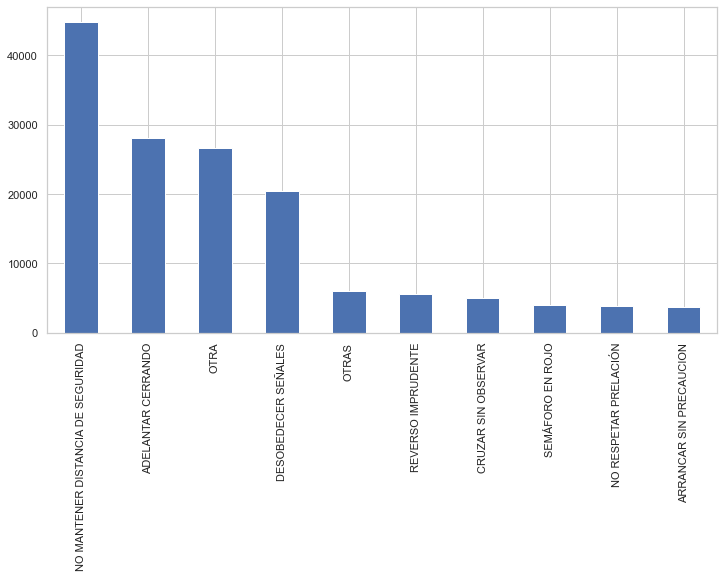

In [55]:
p[0].value_counts().head(10).plot(kind='bar',figsize=(12,6))
plt.xticks(rotation=90);

In [66]:
import plotly.graph_objects as go
fd = p[0].value_counts().reset_index().head(10)
import plotly.express as px
fig = px.bar(fd, x="index", y=0)
fig.update_traces(marker_color='rgb(240,128,128)',          \
    marker_line_color='rgb(8,48,107)',                      \
    marker_line_width=1.5, opacity=0.8)
fig.show()